In [1]:
from google.colab import drive
drive.mount('./MyDrive')

Drive already mounted at ./MyDrive; to attempt to forcibly remount, call drive.mount("./MyDrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
parking_df = pd.read_csv('/content/MyDrive/MyDrive/실전db.csv')
weather_df = pd.read_csv('/content/MyDrive/MyDrive/서울시_기상데이터.csv', encoding="cp949")

In [4]:
parking_df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR
...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J


In [5]:
weather_df

,지점,일시,기온,강수량,풍속,습도,일조시간,적설량,지면온도,지중온도
0,108,2020-01-01 1:00,-5.9,NaN,1.7,40,NaN,NaN,-2.4,3.2
1,108,2020-01-01 2:00,-5.7,NaN,0.1,42,NaN,NaN,-2.4,3.1
2,108,2020-01-01 3:00,-5.6,0.0,0.0,46,NaN,NaN,-2.7,3.1
3,108,2020-01-01 4:00,-5.4,NaN,0.0,50,NaN,NaN,-2.5,3.0
4,108,2020-01-01 5:00,-5.2,NaN,0.0,55,NaN,NaN,-2.2,3.0
...,...,...,...,...,...,...,...,...,...,...
8755,108,2020-12-30 20:00,-11.8,NaN,4.8,54,NaN,NaN,-6.5,2.2
8756,108,2020-12-30 21:00,-12.4,NaN,3.2,58,NaN,NaN,-6.9,2.2
8757,108,2020-12-30 22:00,-12.7,NaN,2.8,56,NaN,NaN,-7.1,2.1
8758,108,2020-12-30 23:00,-12.9,NaN,2.2,54,NaN,NaN,-7.3,2.1


# 데이터 컬럼의미


1.   USER_ID: 유저ID

2.   JOIN_DATE: 가입일이라고 생각했는데 1970-01-01 이런식으로 70년대도 있어가지고 정확히 뭔지 모르겠음 주차장 운영시작일일수도 있음

3.   D_TYPE: 

4.   STORE_ID: 상점ID

5.   GOODS_TYPE: 주차장관련 어플이니깐 주차권타입???

6.   DATE: 결제일

7.   COUNT: 결제건수

8.   AD1: 매장 지역코드



In [6]:
parking_df['JOIN_DATE'].sort_values()

176320    1970-01-01
625539    1970-01-01
226658    1970-01-01
226415    1970-01-01
226042    1970-01-01
             ...    
879214    2020-12-31
879213    2020-12-31
879212    2020-12-31
879230    2020-12-31
879270    2020-12-31
Name: JOIN_DATE, Length: 879271, dtype: object

In [7]:
parking_df[parking_df['JOIN_DATE']=='1970-01-02'] # 1970-01-01 에러일 가능성이 높음

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1


In [8]:
print(parking_df.shape) # 데이터의 행, 열 개수 출력
print(parking_df.dtypes) # 데이터의 타입 출력

(879271, 8)
USER_ID        int64
JOIN_DATE     object
D_TYPE        object
STORE_ID       int64
GOODS_TYPE    object
DATE          object
COUNT          int64
AD1           object
dtype: object


In [9]:
parking_df.isna().sum() # NaN은 없음

USER_ID       0
JOIN_DATE     0
D_TYPE        0
STORE_ID      0
GOODS_TYPE    0
DATE          0
COUNT         0
AD1           0
dtype: int64

In [10]:
parking_df.describe() # 컬럼별 요약 통계 지표 출력

,USER_ID,STORE_ID,COUNT
count,8.792710e+05,879271.000000,879271.000000
mean,1.206566e+06,149599.960642,1.029079
std,4.206529e+05,68898.035318,0.512428
min,2.240000e+02,4.000000,1.000000
25%,9.005760e+05,92437.000000,1.000000
50%,1.321440e+06,173059.000000,1.000000
75%,1.542416e+06,220661.000000,1.000000
max,1.830598e+06,231465.000000,61.000000


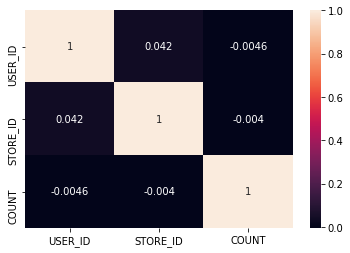

In [11]:
sns.heatmap(parking_df.corr(), annot=True); # 상관관계 1에 가까울수록 연관성이 아주 크다는 의미

In [12]:
parking_df['JOIN_DATE'] = pd.to_datetime(parking_df['JOIN_DATE'])
parking_df['DATE'] = pd.to_datetime(parking_df['DATE'])

In [48]:
parking_df['Weekday'] = parking_df['DATE'].dt.weekday # 0:월 1:화 2:수 3:목 4:금 5:토 6:일
parking_df

,USER_ID,JOIN_DATE,D_TYPE,STORE_ID,GOODS_TYPE,DATE,COUNT,AD1,Weekday
0,2858,2014-01-07,AA,1892,A,2020-01-01,1,GN,2
1,5647,2014-02-14,BB,182009,A,2020-01-01,1,J,2
2,33314,2014-11-20,BB,82431,A,2020-01-01,1,SC,2
3,37001,2014-12-04,BB,725,C,2020-01-01,1,MP,2
4,37819,2014-12-07,AA,220691,C,2020-01-01,1,JRR,2
...,...,...,...,...,...,...,...,...,...
879266,1830551,2020-12-31,BB,219886,B,2020-12-31,1,GN,3
879267,1830570,2020-12-31,BB,82433,B,2020-12-31,1,CY,3
879268,1830580,2020-12-31,AA,92020,B,2020-12-31,1,JRR,3
879269,1830589,2020-12-31,BB,92437,B,2020-12-31,1,J,3


# 전처리 방향


1.   D_TYPE 확실히 뭘 의미하는지 확인

2.   AD1 확실히 뭘 의미하는지 확인

3.   GOODS_TYPE 확실히 뭘 의미하는지 확인

4.   USER_ID 분석

5.   STORE_ID 분석

6.   COUNT 분석


# 1. D_TYPE & AD1 & GOODS_TYPE



# 어플을 확인했을 때 결제 방법으로 카드/ 휴대폰결제 / 네이버 페이 3가지 방법이 있었음 AA / BB / CC는 혹시 결제방법 아닐까??

In [49]:
parking_df.groupby(['USER_ID','STORE_ID'])['D_TYPE'].value_counts()

USER_ID  STORE_ID  D_TYPE
224      92510     AA        1
         181833    AA        1
232      28018     BB        8
         92144     BB        2
         109555    BB        2
                            ..
1830551  219886    BB        1
1830570  82433     BB        1
1830580  92020     AA        1
1830589  92437     BB        1
1830598  220959    AA        1
Name: D_TYPE, Length: 321606, dtype: int64

In [50]:
parking_df['D_TYPE'].value_counts()

AA    493166
BB    384541
CC      1564
Name: D_TYPE, dtype: int64

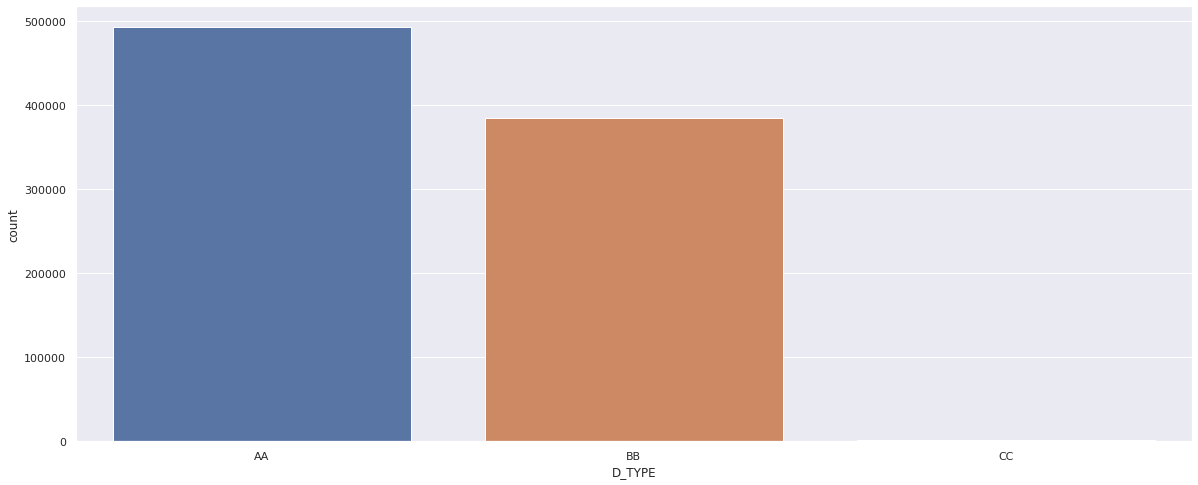

In [51]:
sns.countplot(data=parking_df, x='D_TYPE'); 

#USER_ID / STORE_ID가 둘다 D_TYPE에 count가 되는걸 보면 결제방법일 가능성이 높음

# J / GN / JRR / SC / MP 지역명을 약자로 적은것 같음 중구 강남구 종로구 서초구 마포구 등등

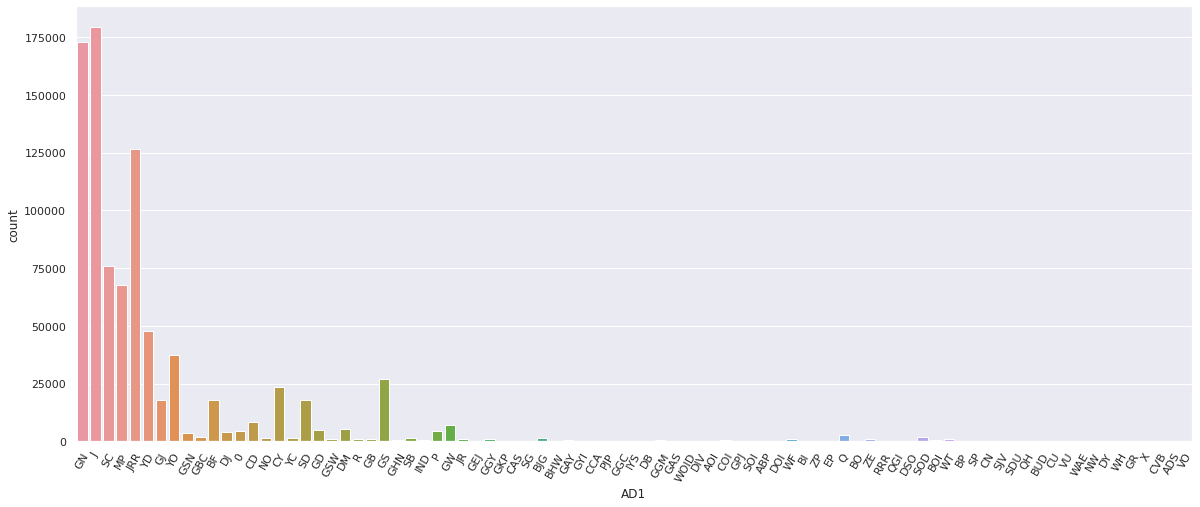

In [53]:
sns.set(rc={'figure.figsize':(20,8)})
plt.xticks(rotation=60)
sns.countplot(data=parking_df, x='AD1');

In [58]:
parking_df.groupby('Weekday')['AD1'].value_counts()
# 지역이라면 평일과 주말에 회사지역과 번화가 지역의 주차차이가 있을꺼라고 생각

Weekday  AD1
0        J      29250
         GN     24235
         JRR    17224
         SC      9746
         MP      8469
                ...  
6        DIV        1
         GR         1
         QGI        1
         QH         1
         VO         1
Name: AD1, Length: 534, dtype: int64

In [84]:
mon_df = parking_df[parking_df['Weekday']==0]
mon_df= mon_df[['COUNT','AD1','Weekday']]

wed_df = parking_df[parking_df['Weekday']==2]
wed_df = wed_df[['COUNT','AD1','Weekday']]

fri_df = parking_df[parking_df['Weekday']==4]
fri_df = fri_df[['COUNT','AD1','Weekday']]

sat_df = parking_df[parking_df['Weekday']==5]
sat_df = sat_df[['COUNT','AD1','Weekday']]

sun_df = parking_df[parking_df['Weekday']==6]
sun_df = sun_df[['COUNT','AD1','Weekday']]

[Text(0.5, 1.0, 'Fri_AD1')]

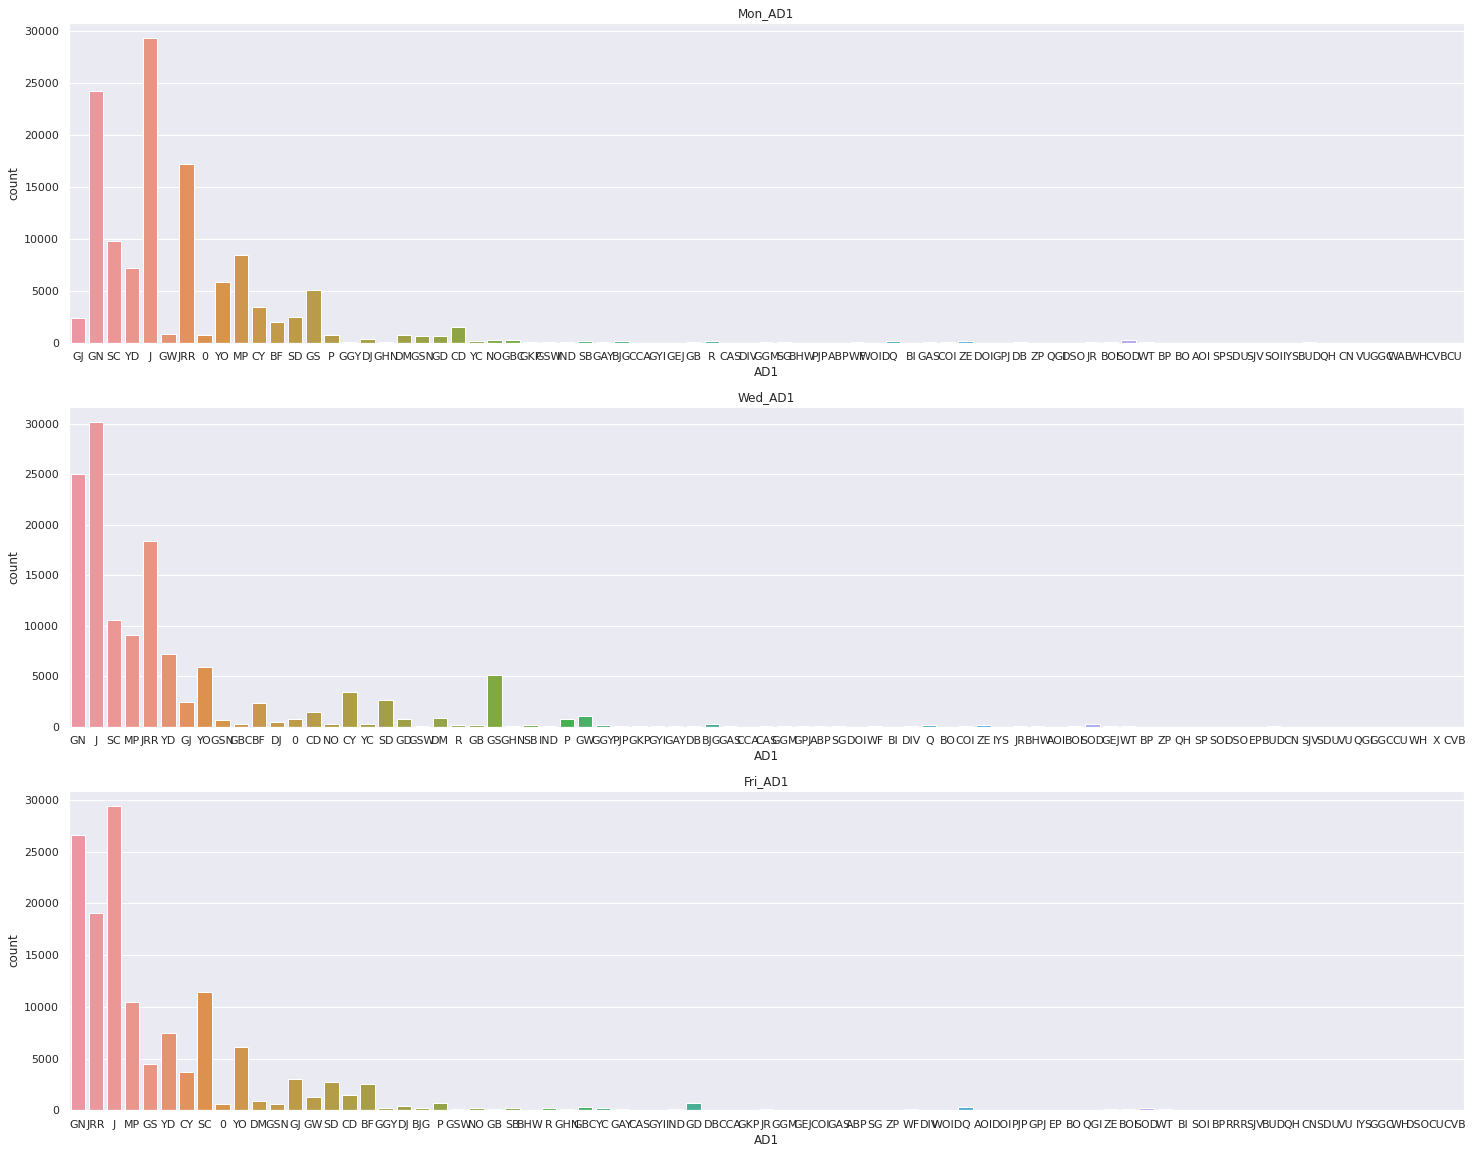

In [93]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=mon_df, x='AD1', ax=ax1).set(title='Mon_AD1')
sns.countplot(data=wed_df, x='AD1', ax=ax2).set(title='Wed_AD1')
sns.countplot(data=fri_df, x='AD1', ax=ax3).set(title='Fri_AD1')


[Text(0.5, 1.0, 'Sun_AD1')]

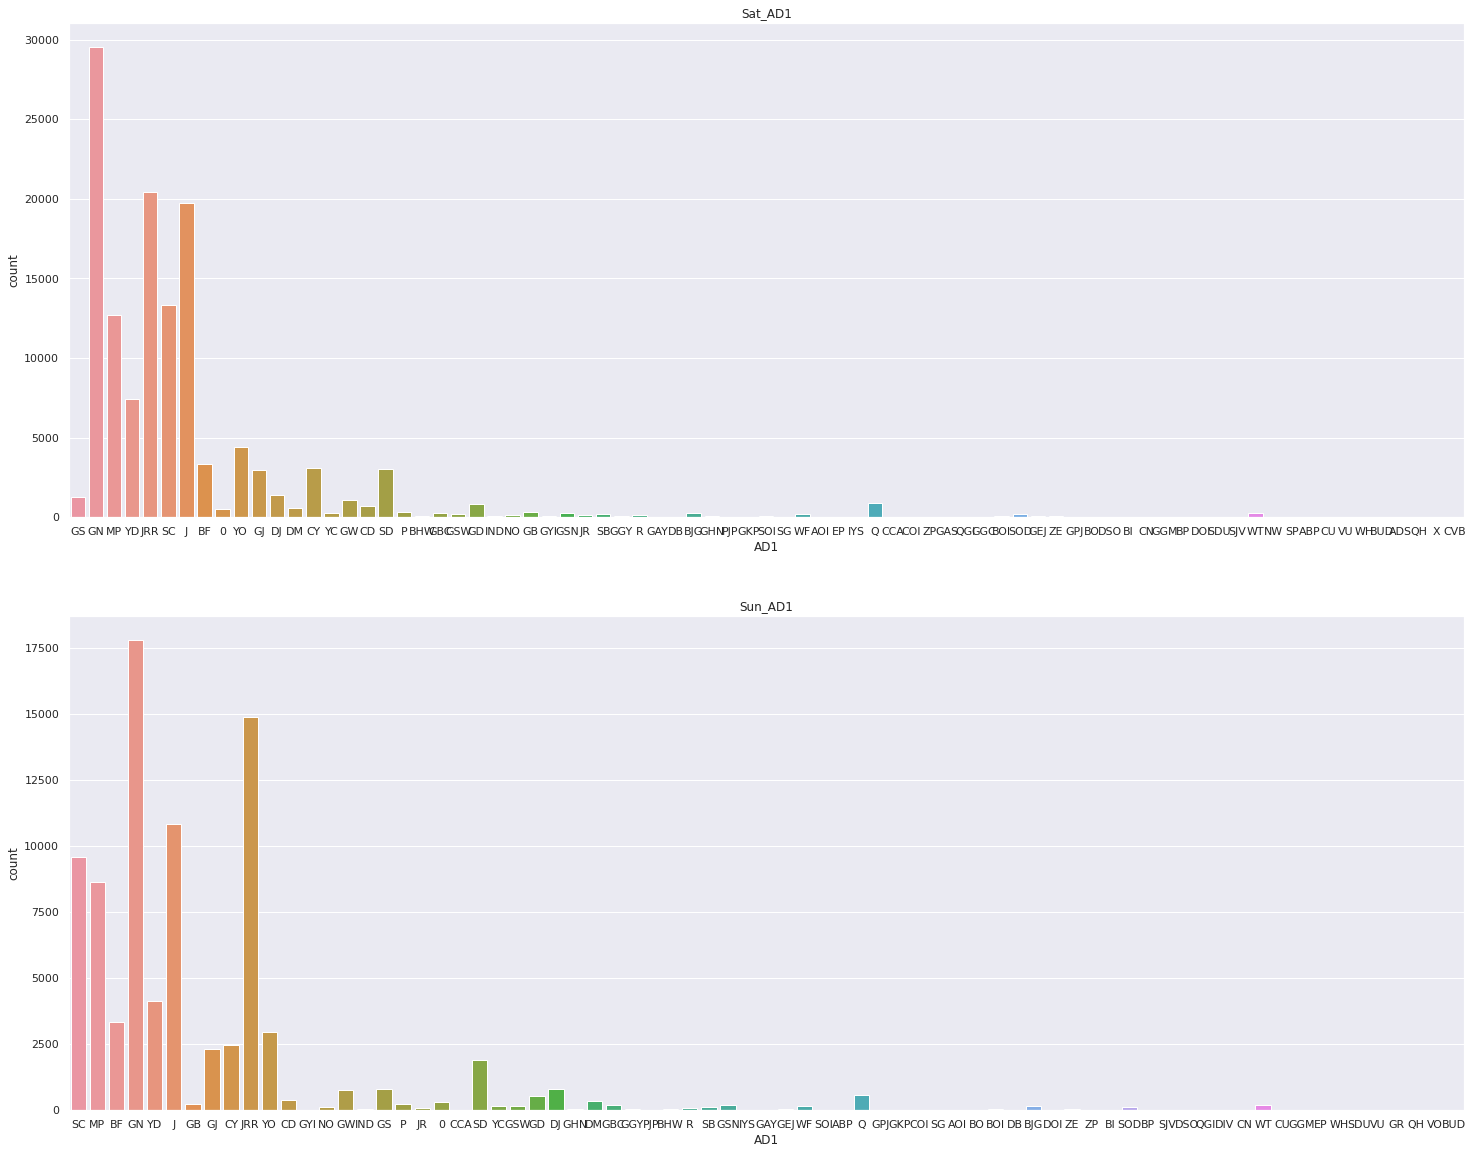

In [94]:
figure, (ax4, ax5) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(25,20)

sns.countplot(data=sat_df, x='AD1', ax=ax4).set(title='Sat_AD1')
sns.countplot(data=sun_df, x='AD1', ax=ax5).set(title='Sun_AD1')

#평일 월수금 주말 나눠서 분석


1.   평일 J 1위 주말 3위 --> 평균 값 평일: 30000 주말: 17000

2.   평일 GN 2위 주말 1위 --> 평균 값 평일: 25000 주말: 23000

3.   평일 JRR 3위 주말 2위 --> 평균 값 평일: 17000 주말: 17000

4.   평일 SC 4위 주말 4위 --> 평균 값 평일: 10000 주말: 10000

5.   평일 MP 5위 주말 5위 --> 평균 값 평일: 9000 주말: 10000

6.   평일 YD 6위 주말 6위 --> 평균 값 평일: 7000 주말: 5000


---
# 지역을 의미하는것 같지만 평일과 주말에 변동이 크지 않으므로 정확히는 모르겠음






# 모두의 주차장 홈페이지에서 예시로 

평일 당일권 / 3시간권(시간은 주차장마다 다름) / 평일 심야권 / 휴일 당일권 이렇게 예시를 들고 있음

Goods type으로 주차권 타입이 가능성이 높음

In [54]:
parking_df['GOODS_TYPE'].value_counts()

A    609790
C    131163
B    118541
D     19777
Name: GOODS_TYPE, dtype: int64

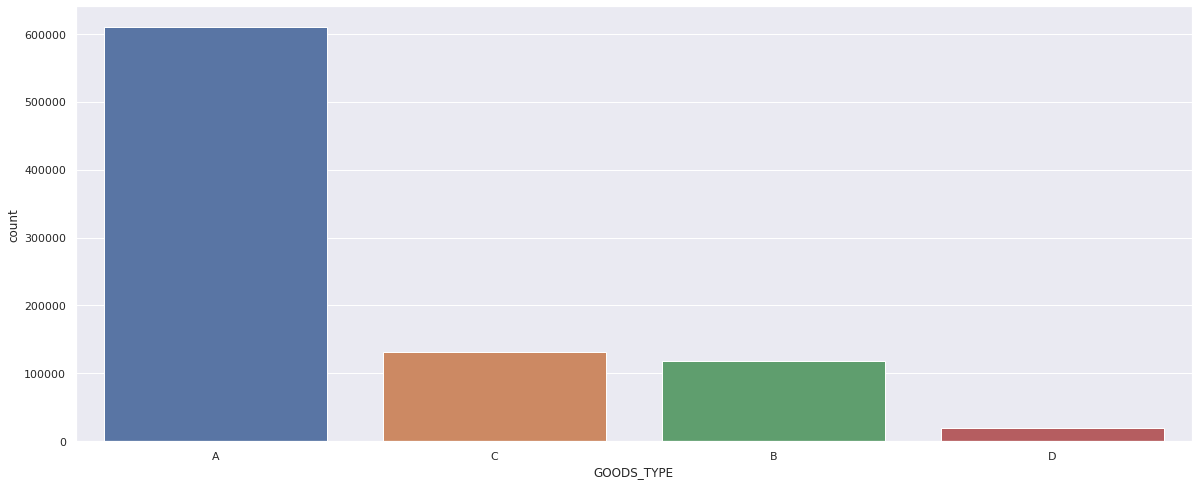

In [55]:
sns.countplot(data=parking_df, x='GOODS_TYPE');

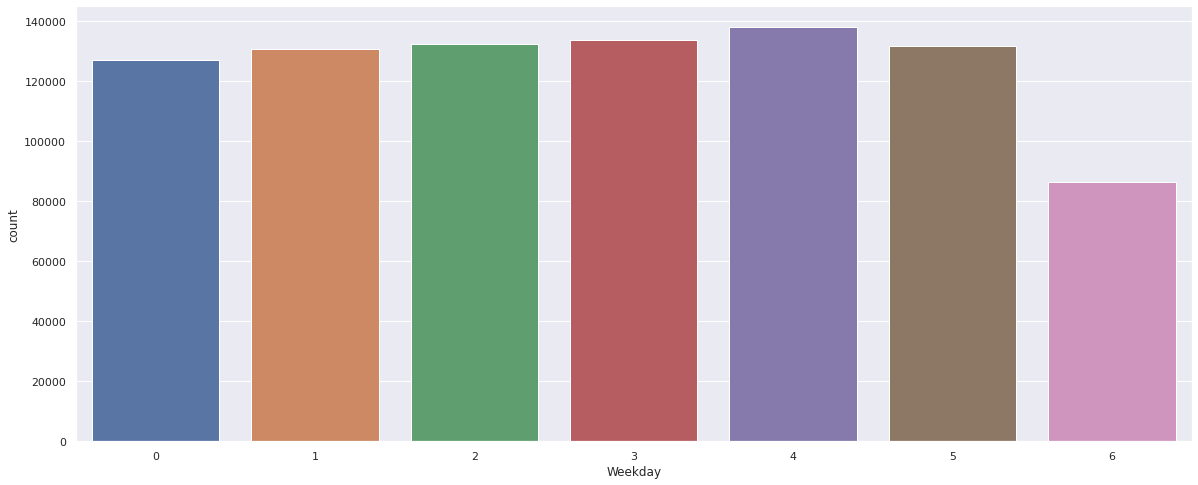

In [56]:
sns.countplot(data=parking_df, x='Weekday');

In [57]:
parking_df.groupby('Weekday')['GOODS_TYPE'].value_counts()

Weekday  GOODS_TYPE
0        A             89099
         B             16993
         C             16733
         D              4227
1        A             89400
         B             20744
         C             17489
         D              3048
2        A             89360
         B             21586
         C             18231
         D              3108
3        A             89246
         B             22793
         C             18291
         D              3286
4        A             86662
         B             27847
         C             19913
         D              3495
5        A             99048
         C             24413
         B              6218
         D              1801
6        A             66975
         C             16093
         B              2360
         D               812
Name: GOODS_TYPE, dtype: int64

# 요일 비교로 GOODS_TYPE 구분



1.   주말에 C가 증가하는걸 보면 C는 휴일 당일권일 가능성이 높음

2.   주말에 D가 감소하는걸 보면 D는 평일 심야권일 가능성이 높음

3.   주말에 B가 감소하는걸 보면 B는 평일 당일권일 가능성이 높음

4.   남은 A는 시간권일 가능성이 높음


---

# 요일 카운터로 비교

금요일까지 증가하다가 주말에 감소하는 경향이 보임
